# Linear Regression

## Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from numpy.random import seed

seed(1)

# MSE
def cost_function(x, y, m, b):
    N = len(x)
    total_error = 0.0
    for i in range(N):
        total_error += (y[i] - (m*x[i] + b))**2   #y[i]: true y value, m*x[i] + b: predicted y value, error = difference of the two
    return total_error / N

# Derivative of MSE
def update_weights(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))
        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))
    
    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b  

# Generate arbitrary data to fit
def generate_data(m,b,start,end):
    xs = np.array(range(start,end))
    ys = m*(xs) + b
    return xs,ys

# Randomizes generation of parameters to generate data
def ini_param(p_range):
    m,b = np.random.randint(-p_range,p_range,2)
    return m,b

def train(m, b, xs, ys, alpha, iterations):
    for i in range(iterations):
        m, b = update_weights(m,b,xs,ys,alpha)
    return m,b

def predict_ys(m, b, xs):
    y_preds = []
    for x in xs:
        y = m*x + b
        y_preds.append(y)
    return y_preds

def mean_squared_error(y_preds, y_trues):
    return np.square(np.subtract(y_preds, y_trues)).mean()

def mean_error(y_preds, y_trues):
    return (np.subtract(y_preds, y_trues)).mean()

## Estimate Parameters
 We use toy linear data with preset m and b values to train our model with starting from randomized estimates. We notice the estimates approach the actual values of m and b using gradient descent.

In [10]:
# Intialize parameters and data    
m_true = 2
b_true = 1
xs,ys = generate_data(m_true,b_true,0,10)
lr = 0.01
iterations = 750
p_range = 50
m,b = ini_param(p_range)

# Report Initial
print("PARAMETERS")
print(f"Actual - m,b: {m_true},{b_true}")
print(f"Initial - m,b: {m},{b} - cost: {cost_function(xs,ys,m,b)}")

# Train
m,b = train(m,b,xs,ys,lr,iterations)

# Prediction and accuracy
preds_ys = predict_ys(m,b,xs)
MSE = mean_squared_error(preds_ys, ys)

# Report Final
print(f"Estimate - m,b: {m},{b} - cost: {cost_function(xs,ys,m,b)}")
trues = zip(xs,ys)
preds = zip(xs,preds_ys)
preds_str = ", ".join(map(str, preds))
trues_str = ", ".join(map(str, trues))
print(f"\nY VALUES")
print(f"Actual (xs,ys) - [{trues_str}]")
print(f"Final Predictions (xs,ys) - [{preds_str}]")
print(f"MSE: {MSE}\n")

PARAMETERS
Actual - m,b: 2,1
Initial - m,b: 2,42 - cost: 1681.0
Estimate - m,b: 1.9088156552382103,1.5717792614218338 - cost: 0.09466133287658043

Y VALUES
Actual (xs,ys) - [(0, 1), (1, 3), (2, 5), (3, 7), (4, 9), (5, 11), (6, 13), (7, 15), (8, 17), (9, 19)]
Final Predictions (xs,ys) - [(0, 1.5717792614218338), (1, 3.480594916660044), (2, 5.389410571898255), (3, 7.298226227136465), (4, 9.207041882374675), (5, 11.115857537612886), (6, 13.024673192851097), (7, 14.933488848089304), (8, 16.842304503327515), (9, 18.751120158565726)]
MSE: 0.09466133287658043



# Confidence Intervals For Our Parameter Estimates
We can use confidence intervals to understand the distribution of test performance over 100 trials.

In [11]:
# 100 samples of m and b predictions
m_stats = np.array([],dtype="int32")
b_stats = np.array([],dtype="int32")
for i in range(100):
    m,b = ini_param(p_range)
    m,b = train(m,b,xs,ys,lr,iterations)
    m_stats = np.append(m_stats,m)
    b_stats = np.append(b_stats,b)

# confidence intervals
alphas = np.array([0.95,.9,.85,.8])
for alpha in alphas:
    print(f'{alpha*100} Confidence Interval')
    p_lower = ((1.0-alpha)/2.0) * 100
    p_upper = (alpha+((1.0-alpha)/2.0)) * 100

    m_lower = np.percentile(m_stats, p_lower)
    m_upper = np.percentile(m_stats, p_upper)
    print(f'm: {m_lower:.2f} and {m_upper:.2f}')

    b_lower = np.percentile(b_stats, p_lower)
    b_upper = np.percentile(b_stats, p_upper)
    print(f'b: {b_lower:.2f} and {b_upper:.2f}')

95.0 Confidence Interval
m: 1.90 and 2.11
b: 0.29 and 1.64
90.0 Confidence Interval
m: 1.90 and 2.11
b: 0.34 and 1.63
85.0 Confidence Interval
m: 1.90 and 2.10
b: 0.36 and 1.61
80.0 Confidence Interval
m: 1.91 and 2.10
b: 0.39 and 1.59


## Normalcy Testing
We can see if our estimates of the linear parameters are normally distributed with various methods. By collecting estimates we can visualize the distribution with histogram or a QQ plot, or also use various statistical tests for normalcy such as Shapiro, D’Agostino’s K^2, and Anderson-Darling.

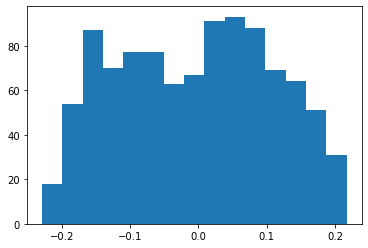

Histogram does not look Gaussian


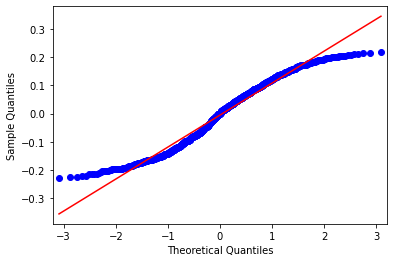

QQ Plot does not look Gaussian
Shapiro: Statistics=0.967, p=0.000
	Sample does not look Gaussian (reject H0)
D’Agostino’s K^2: Statistics=378.260, p=0.000
	Sample does not look Gaussian (reject H0)
Anderson-Darling: Statistic= 8.849
	15.000 0.574, data does not look normal (reject H0)
	10.000 0.653, data does not look normal (reject H0)
	5.000 0.784, data does not look normal (reject H0)
	2.500 0.914, data does not look normal (reject H0)
	1.000 1.088, data does not look normal (reject H0)


In [13]:
# This one takes a little while to run
# Collect 1000 accuracies of 1000 different m and b predictions. 
error_stats = np.array([],dtype="int32")
for i in range(1000):
    m,b = ini_param(p_range)
    m,b = train(m,b,xs,ys,lr,iterations)
    preds_ys = predict_ys(m,b,xs)
    # not MSE since squaring makes errors all positive. We want to see full distribution from positive to negative
    ME = mean_error(preds_ys, ys)
    error_stats = np.append(error_stats,ME)

# Visualize Distribution
plt.hist(error_stats,15)
plt.show()
print('Histogram does not look Gaussian')

# QQ Plot
qqplot(error_stats, line='s')
plt.show()
print('QQ Plot does not look Gaussian')

# Statistical Normality Tests
from scipy.stats import shapiro
stat, p = shapiro(error_stats)
print(f'Shapiro: Statistics={stat:.3f}, p={p:.3f}')
# interpret
alpha = 0.05
if p > alpha:
	print(f'\tSample looks Gaussian (fail to reject H0)')
else:
	print(f'\tSample does not look Gaussian (reject H0)')

from scipy.stats import normaltest
# normality test
stat, p = normaltest(error_stats)
print(f'D’Agostino’s K^2: Statistics={stat:.3f}, p={p:.3f}')
# interpret
alpha = 0.05
if p > alpha:
	print(f'\tSample looks Gaussian (fail to reject H0)')
else:
	print(f'\tSample does not look Gaussian (reject H0)')

from scipy.stats import anderson
# normality test
result = anderson(error_stats)
print('Anderson-Darling: Statistic= %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'\t{sl:.3f} {cv:.3f}, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print(f'\t{sl:.3f} {cv:.3f}, data does not look normal (reject H0)')